#### Testar diversas features do talib

In [137]:
# BASIC
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime

import joblib

# CLASSIFIER
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#REGRESSOR
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor

# PRE-PROCESSING
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest

#METRICS
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import log_loss

# STATISTIC
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#INDICATORS
import pandas_ta as ta
from finta import TA
import talib

# DATA VIZ
import matplotlib.pyplot as plt
import seaborn as sns

# WARNING
import warnings
warnings.filterwarnings("ignore")

In [87]:
# APPL HORA EXEMPLO DO ANDRE KUNIYOSHI
colunas = ['Time', 'Open', 'High', 'Low', 'Close','Adj Close','Volume']
df_base = pd.read_csv(r'C:\_PY\Trade_NB\_DS\Bases\df_AAPL_hora.csv')
df_base.columns = colunas
df_base['Time'] = pd.to_datetime(df_base['Time'], utc=True)
df_base.set_index('Time', inplace=True)

df_base = df_base[['Open', 'High', 'Low', 'Close','Adj Close','Volume']]

# conferindo o tamanho do dataset
print('AAPL tamanho:', df_base.shape)

AAPL tamanho: (2273, 6)


In [88]:
# list of functions
#talib.get_functions()
#talib.get_function_groups()

In [141]:
df_base.isnull().sum()

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
Open_rolling_mean_3      0
Open_rolling_mean_7      0
High_rolling_mean_3      0
High_rolling_mean_7      0
Low_rolling_mean_3       0
Low_rolling_mean_7       0
Close_rolling_mean_3     0
Close_rolling_mean_7     0
Volume_rolling_mean_3    0
Volume_rolling_mean_7    0
Open_rolling_std_3       0
Open_rolling_std_7       0
High_rolling_std_3       0
High_rolling_std_7       0
Low_rolling_std_3        0
Low_rolling_std_7        0
Close_rolling_std_3      0
Close_rolling_std_7      0
Volume_rolling_std_3     0
Volume_rolling_std_7     0
dtype: int64

In [142]:
df_base.isna().sum()

Open                     0
High                     0
Low                      0
Close                    0
Adj Close                0
Volume                   0
Open_rolling_mean_3      0
Open_rolling_mean_7      0
High_rolling_mean_3      0
High_rolling_mean_7      0
Low_rolling_mean_3       0
Low_rolling_mean_7       0
Close_rolling_mean_3     0
Close_rolling_mean_7     0
Volume_rolling_mean_3    0
Volume_rolling_mean_7    0
Open_rolling_std_3       0
Open_rolling_std_7       0
High_rolling_std_3       0
High_rolling_std_7       0
Low_rolling_std_3        0
Low_rolling_std_7        0
Close_rolling_std_3      0
Close_rolling_std_7      0
Volume_rolling_std_3     0
Volume_rolling_std_7     0
dtype: int64

#### Feature Enginnering | Stock price prediction

In [91]:
lag_features = ['Open', 'High', 'Low','Close','Volume']
window1=3
window2=7

In [92]:
for feature in lag_features:
    df_base[feature + '_rolling_mean_3'] = df_base[feature].rolling(window=window1).mean()
    df_base[feature + '_rolling_mean_7'] = df_base[feature].rolling(window=window2).mean()

In [93]:
for feature in lag_features:
    df_base[feature + '_rolling_std_3'] = df_base[feature].rolling(window=window1).std()
    df_base[feature + '_rolling_std_7'] = df_base[feature].rolling(window=window2).std()

In [94]:
df_base.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Open_rolling_mean_3', 'Open_rolling_mean_7', 'High_rolling_mean_3',
       'High_rolling_mean_7', 'Low_rolling_mean_3', 'Low_rolling_mean_7',
       'Close_rolling_mean_3', 'Close_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Open_rolling_std_3', 'Open_rolling_std_7',
       'High_rolling_std_3', 'High_rolling_std_7', 'Low_rolling_std_3',
       'Low_rolling_std_7', 'Close_rolling_std_3', 'Close_rolling_std_7',
       'Volume_rolling_std_3', 'Volume_rolling_std_7'],
      dtype='object')

In [95]:
df_base.dropna(inplace=True)

In [96]:
# independent features
ind_features = ['Open_rolling_mean_3', 'Open_rolling_mean_7', 'High_rolling_mean_3',
       'High_rolling_mean_7', 'Low_rolling_mean_3', 'Low_rolling_mean_7',
       'Close_rolling_mean_3', 'Close_rolling_mean_7', 'Volume_rolling_mean_3',
       'Volume_rolling_mean_7', 'Open_rolling_std_3', 'Open_rolling_std_7',
       'High_rolling_std_3', 'High_rolling_std_7', 'Low_rolling_std_3',
       'Low_rolling_std_7', 'Close_rolling_std_3', 'Close_rolling_std_7',
       'Volume_rolling_std_3', 'Volume_rolling_std_7']

In [97]:
trainning_data = df_base[0:1800]

In [98]:
test_data = df_base[1800:]

In [99]:
len(test_data)

467

#### ARIMA BUGADO

In [102]:
#Building Stock Price Prediction model | Data Analysis Project | Machine Learning | Python tutorial
#https://www.youtube.com/watch?v=IoLts_MBDeA&list=PLLusFq4Eepy8rEu1qUSrY6bcQoHpBRGs8&index=7
from pmdarima import auto_arima

In [103]:
#model = auto_arima(y=trainning_data['Adj Close'], exogenous=trainning_data[ind_features], trace=True)
model = auto_arima(y=trainning_data['Adj Close'], exogenous=trainning_data[ind_features], trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4537.712, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4530.728, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4531.905, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4531.922, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4530.251, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4533.739, Time=0.83 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.281 seconds


In [104]:
#model.fit(trainning_data['VWAP'], trainning_data[ind_features])
model.fit(trainning_data['Adj Close'], trainning_data[ind_features])

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [126]:
forecast = pd.DataFrame(model.predict(n_periods = len(test_data), exogenous=test_data[ind_features], X=test_data[ind_features]))
forecast['Time'] = test_data.index
forecast.index = forecast.Time

In [134]:
test_data['forecast_ARIMA'] = forecast[0]

<AxesSubplot:xlabel='Time'>

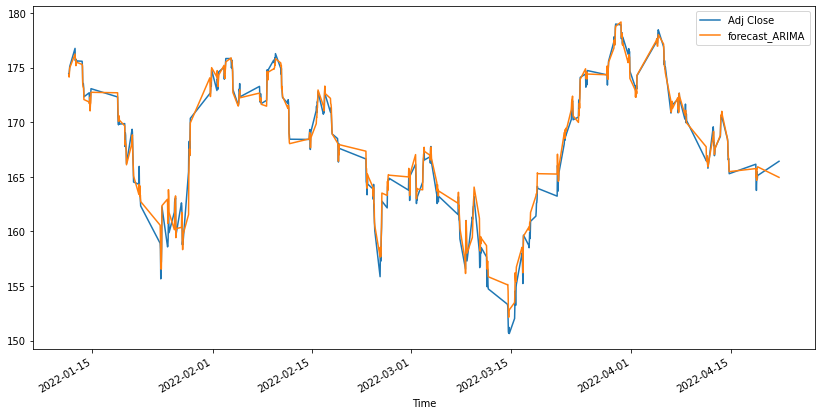

In [136]:
test_data[['Adj Close','forecast_ARIMA']].plot(figsize=[14,7])

In [138]:
np.sqrt(mean_squared_error(test_data['Adj Close'], test_data['forecast_ARIMA']))

0.8336522096881674

In [139]:
mean_absolute_error(test_data['Adj Close'], test_data['forecast_ARIMA'])

0.5918209252779864

In [100]:
import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor

In [101]:
# CLASSIFICATION
Lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True)
lz_c_models, lz_c_predictions = Lazy_clf.fit(x_train, x_test, y_train, y_test)
lz_c_models

NameError: name 'x_train' is not defined

In [ ]:
# REGRESSION
Lazy_regr = LazyRegressor(verbose=0, ignore_warnings=True) # custom_metric=None
lz_r_models, lz_r_predictions = Lazy_regr.fit(rx_train, rx_test, ry_train, ry_test)
lz_r_models

## INDICADORES

#### CHAT GPT 180 % de assertividade em um ano no BITCOIN

In [143]:
df_base['ema20'] = TA.EMA(df_base, 20)
df_base['ema50'] = TA.EMA(df_base, 50)

<AxesSubplot:xlabel='Time'>

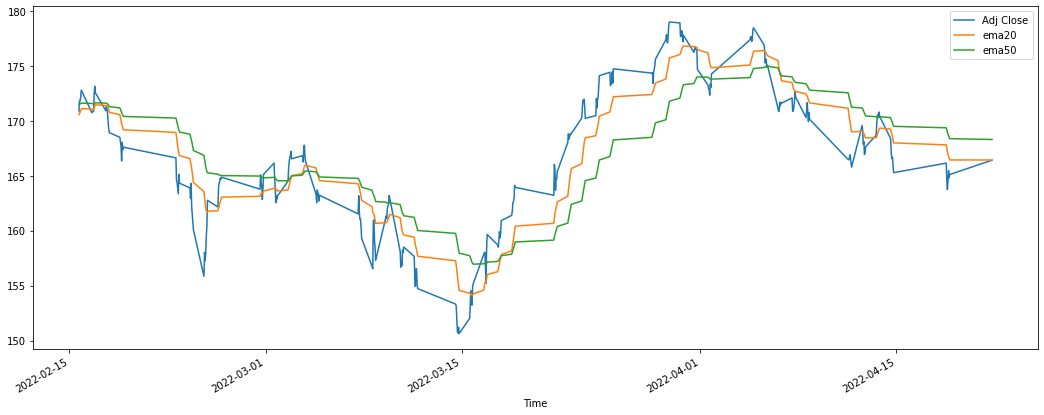

In [151]:
df_base[['Adj Close', 'ema20', 'ema50']].tail(300).plot(figsize=[18,7])